## Play with old code

In [1]:
from graspologic.embed import CovariateAssistedSpectralEmbed

import numpy as np
import graspologic as gs
from graspologic.simulations import sbm
from graspologic.plot import heatmap, pairplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(8889)

### Generate covariates matrix

In [2]:
P = np.full((3, 3), .9)
P[np.diag_indices_from(P)] = .2

P

array([[0.2, 0.9, 0.9],
       [0.9, 0.2, 0.9],
       [0.9, 0.9, 0.2]])

In [3]:
n = 1000
# p, q = .9, .3
p, q = .5, .2
P = np.array([[p, q, q], 
              [q, p, q],
              [q, q, p]])
A, labels = sbm([n, n, n], P, return_labels=True)

# generate a reasonable covariate matrix for A.
# in the kth block, the probability of the kth covariate being 1 is m1
# and the probability of the other covariates being 1 is m2
# m1, m2 = .9, .1
m1, m2 = .8, .2

M = np.array([[m1, m2, m2],
              [m2, m1, m2],
              [m2, m2, m1]])

# Generate X
def gen_covariates(m1, m2, labels):
    n = len(labels)
    m1_arr = np.random.choice([1, 0], p=[m1, 1-m1], size=n)
    m2_arr = np.random.choice([1, 0], p=[m2, 1-m2], size=(n, 3))
    m2_arr[np.arange(n), labels] = m1_arr
    return m2_arr

X = gen_covariates(m1, m2, labels)

In [ ]:
# using block probability covariates matrix
X = 

In [4]:
I = np.eye(3)
np.repeat(I, 3, axis=0)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

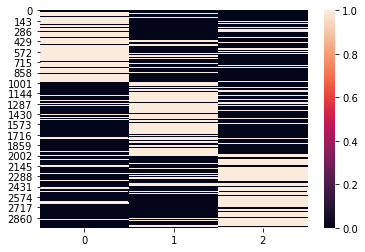

In [5]:
sns.heatmap(X)
plt.savefig("../figs/covariates.png", dpi=300, bbox_inches="tight")

<AxesSubplot:>

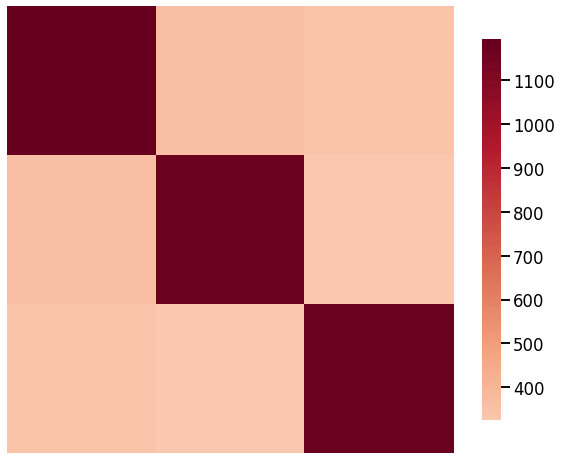

In [6]:
heatmap(X.T@X)

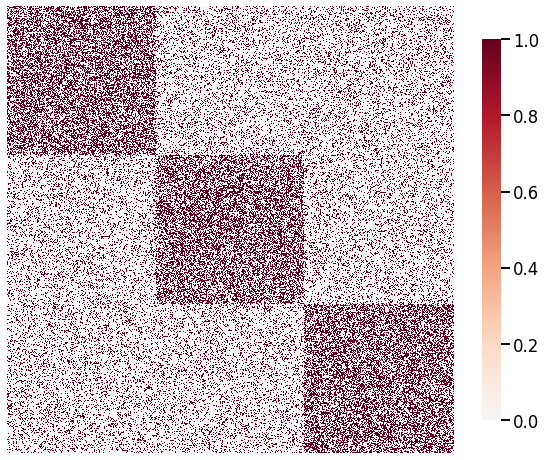

In [7]:
heatmap(A)
plt.savefig("../figs/adjacency_matrix.png", bbox_inches="tight", dpi=300)

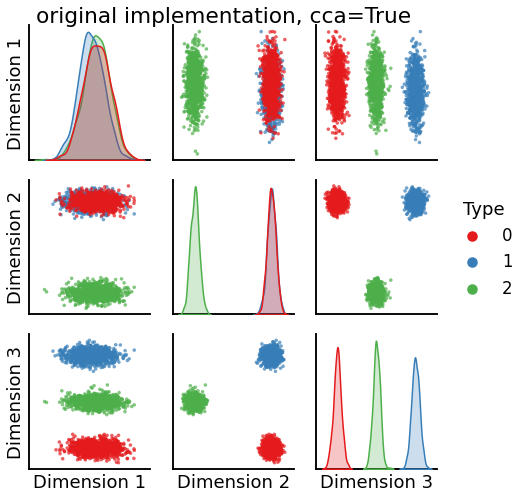

In [8]:
casc = CovariateAssistedSpectralEmbed(form='R-DAD', regularizer=1, 
                                      n_components=3, assortative=True,
                                      cca=True, check_lcc=False)
clusters, embedding, h_ops, inertia = casc.fit_predict(A, X)
pairplot(embedding, labels=clusters, title="original implementation, cca=True")
plt.savefig("../figs/cca_true.png", bbox_inches='tight', dpi=300)

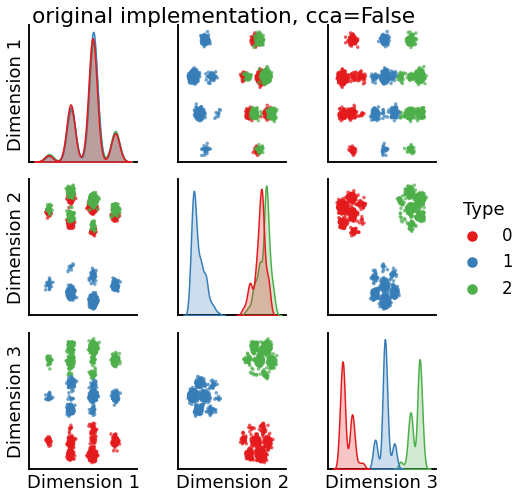

In [9]:
casc = CovariateAssistedSpectralEmbed(form='R-DAD', regularizer=1, 
                                      n_components=3, assortative=True,
                                      cca=False)
clusters, embedding, h_ops, inertia = casc.fit_predict(A, X)
pairplot(embedding, labels=clusters, title="original implementation, cca=False")
plt.savefig("../figs/cca_false.png", bbox_inches='tight', dpi=300)